# Análise da OD-2017 
Foi realizada uma análise sobre a pesquisa <mark>Origem e Destino 2017</mark> para compreender a composição do público que viaja a pé, considerando aspectos como sexo, renda familiar, condição de atividade, Critério de Classificação Econômica Brasil... 

Dataset: [OD_2017](https://transparencia.metrosp.com.br/dataset/pesquisa-origem-e-destino/resource/4362eaa3-c0aa-410a-a32b-37355c091075) 

---

In [953]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

Importando o dataset:

In [954]:
od_path = '../data/OD/OD-2017/Banco de Dados-OD2017/od_2017.csv' # OD dataset path
df = pd.read_csv(od_path) 

Verificando as colunas do dataset:

In [955]:
df.columns

Index(['ZONA', 'MUNI_DOM', 'CO_DOM_X', 'CO_DOM_Y', 'ID_DOM', 'F_DOM', 'FE_DOM',
       'DOM', 'CD_ENTRE', 'DATA',
       ...
       'MODOPRIN', 'TIPVG', 'PAG_VIAG', 'TP_ESAUTO', 'VL_EST', 'PE_BICI',
       'VIA_BICI', 'TP_ESBICI', 'DISTANCIA', 'ID_ORDEM'],
      dtype='object', length=128)

Mapeando os meios de transporte para uma coluna descritora(nominal):

In [956]:
# Transport modes dictionary
transport_modes = {
    1: 'Metrô',
    2: 'Trem',
    3: 'Monotrilho',
    4: 'O/MO/P do município de São Paulo', # ônibus/micro-ônibus/perua
    5: 'O/MO/P de outros municípios',
    6: 'O/MO/P metropolitano',
    7: 'Transporte Fretado',
    8: 'Transporte Escolar',
    9: 'Dirigindo Automóvel',
    10: 'Passageiro de Automóvel',
    11: 'Táxi Convencional',
    12: 'Táxi não Convencional',
    13: 'Dirigindo Moto',
    14: 'Passageiro de Moto',
    15: 'Bicicleta',
    16: 'A Pé',
    17: 'Outros'
}

In [957]:
df.loc[:, 'MODO_TRANSPORTE'] = df['MODOPRIN'].map(transport_modes)

Mapeando a coluna numérica para uma nova descritora(SEXO_DESC) sobre o sexo do viajante:

In [958]:
sex_map = {
    1: 'Masculino',
    2: 'Feminino'
}

In [959]:
df.loc[:, 'SEXO_DESC'] = df['SEXO'].map(sex_map)
df.sample(3)

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,...,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESBICI,DISTANCIA,ID_ORDEM,MODO_TRANSPORTE,SEXO_DESC
27217,68,36,329067,7391055,681735,0,113.192661,1735,1,22092018,...,NaN,4.0,NaN,NaN,NaN,NaN,445.65,27218,Dirigindo Moto,Masculino
140125,397,18,364777,7403386,3970360,1,162.028169,360,1,21042018,...,2.0,NaN,NaN,NaN,NaN,NaN,17427.59,140126,O/MO/P metropolitano,Masculino
162527,460,38,319810,7388052,4601343,0,477.565217,1343,1,18042018,...,NaN,1.0,NaN,NaN,NaN,NaN,329.69,162528,Dirigindo Automóvel,Feminino


---
## Representatividade dos meios de transporte
Nesta seção, foi realizado um estudo para compreender quais são os meios de transporte mais utilizados.

In [960]:
selected_columns = ['FE_VIA','MODOPRIN', 'MODO_TRANSPORTE']
trips = df[selected_columns]
trips = trips.copy()
trips.head(3)

,FE_VIA,MODOPRIN,MODO_TRANSPORTE
0,22.132647,16.0,A Pé
1,22.132647,16.0,A Pé
2,18.882487,1.0,Metrô


Verifica se há linhas com valor nulo na coluna de modo de transporte: 

In [961]:
print(trips['MODOPRIN'].isnull().sum())

25100


As linhas com valor nulo na coluna MODOPRIN são descartadas:

In [962]:
trips = trips.dropna(subset=['MODOPRIN'])

Agrupando os meios de transporte e somando seus valores de fator de expansão:

In [963]:
agrouped_t_modes_trips = trips.groupby('MODO_TRANSPORTE')['FE_VIA'].sum().reset_index()
agrouped_t_modes_trips.head(3)

,MODO_TRANSPORTE,FE_VIA
0,A Pé,1.334988e+07
1,Bicicleta,3.769752e+05
2,Dirigindo Automóvel,7.811675e+06


Para calcular a representatividade, deve-se obter o valor total do fator de expansão de viagens:

In [964]:
sum_fevia = agrouped_t_modes_trips['FE_VIA'].sum()
sum_fevia

42006659.869834

Obtendo a representividade de cada meio de transporte de acordo com o fator de expansão:

In [965]:
agrouped_t_modes_trips.loc[:, 'REP (%)'] = (agrouped_t_modes_trips['FE_VIA'] / sum_fevia * 100).round(2)
agrouped_t_modes_trips = agrouped_t_modes_trips.copy().sort_values(by='REP (%)',  ascending=False)
agrouped_t_modes_trips.head(5)

,MODO_TRANSPORTE,FE_VIA,REP (%)
0,A Pé,1.334988e+07,31.78
2,Dirigindo Automóvel,7.811675e+06,18.60
7,O/MO/P do município de São Paulo,5.519489e+06,13.14
10,Passageiro de Automóvel,3.529721e+06,8.40
4,Metrô,3.398961e+06,8.09


Gráfico: Representividade(fator de expansão) x Meio de Transporte

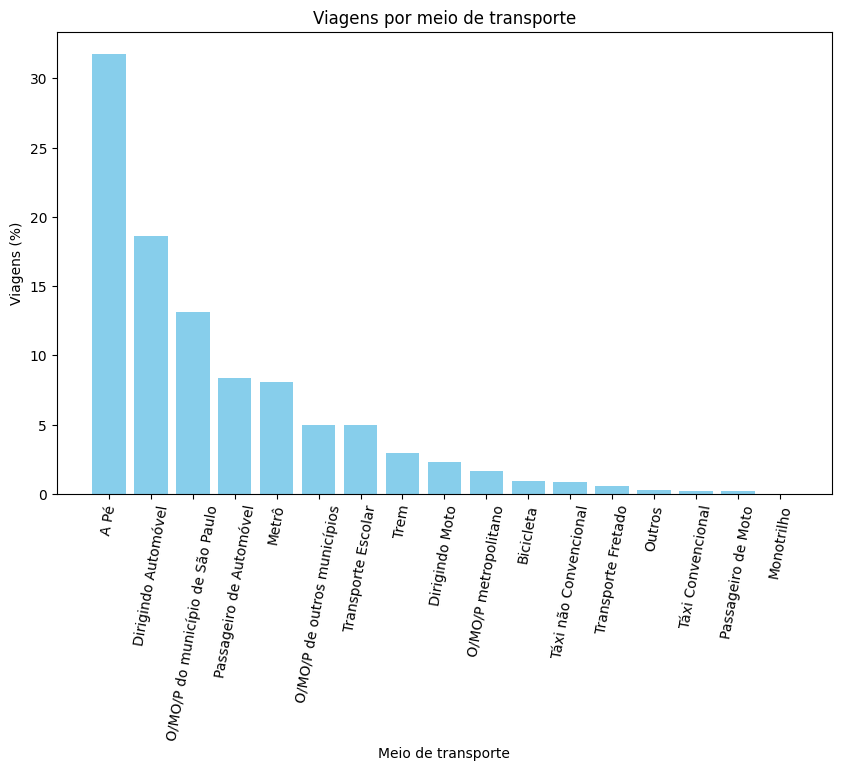

In [1072]:
plt.figure(figsize=(10, 6))
plt.bar(agrouped_t_modes_trips['MODO_TRANSPORTE'], agrouped_t_modes_trips['REP (%)'], color='skyblue')

plt.title("Viagens por meio de transporte")
plt.xlabel("Meio de transporte")
plt.ylabel("Viagens (%)")
plt.xticks(rotation=80)  # Rotaciona os rótulos para melhor legibilidade

plt.show()

---

## Análise censitária
Nesta seção, foi analisada a composição do público que viaja a pé.

### Análise sobre o sexo do público

In [967]:
selected_columns = ['FE_VIA', 'MODO_TRANSPORTE', 'SEXO_DESC']
trips = df[selected_columns]
trips = trips.dropna(subset=['MODO_TRANSPORTE'])
trips.sample(3)

,FE_VIA,MODO_TRANSPORTE,SEXO_DESC
179269,229.508417,O/MO/P do município de São Paulo,Masculino
86628,207.675795,A Pé,Feminino
150567,210.967607,Dirigindo Automóvel,Feminino


In [968]:
gender_trips = trips.copy()

Distribuição de sexo sobre a pesquisa inteira:

In [969]:
gender_counter = (gender_trips['SEXO_DESC'].value_counts(normalize=True)*100).round(2).apply(lambda x: f'{x:.2f}%')
gender_counter

SEXO_DESC
Masculino    50.08%
Feminino     49.92%
Name: proportion, dtype: object

Agrupando sexo ao meio de transporte:

In [970]:
gender_trips = trips.groupby(['SEXO_DESC', 'MODO_TRANSPORTE'])['FE_VIA'].sum().reset_index()
gender_trips.sample(5)

,SEXO_DESC,MODO_TRANSPORTE,FE_VIA
23,Masculino,O/MO/P do município de São Paulo,2.300973e+06
30,Masculino,Trem,5.903586e+05
28,Masculino,Transporte Escolar,1.011440e+06
11,Feminino,Transporte Escolar,1.082102e+06
5,Feminino,O/MO/P de outros municípios,1.268452e+06


Seleciona os meios de transportes x fator de expansão:

In [971]:
t_modes_fe_via = agrouped_t_modes_trips.copy()
t_modes_fe_via.drop('REP (%)', axis=1, inplace=True) 
t_modes_fe_via.rename(columns={'FE_VIA': 'FV_MT'}, inplace=True)
t_modes_fe_via.head(5)

,MODO_TRANSPORTE,FV_MT
0,A Pé,1.334988e+07
2,Dirigindo Automóvel,7.811675e+06
7,O/MO/P do município de São Paulo,5.519489e+06
10,Passageiro de Automóvel,3.529721e+06
4,Metrô,3.398961e+06


Calculando a representatividade de cada meio de transporte relacionado ao sexo:

In [972]:
gender_trips_grouped_t_modes = pd.merge(gender_trips, t_modes_fe_via, on='MODO_TRANSPORTE', how='left')
gender_trips_grouped_t_modes.head(2)

,SEXO_DESC,MODO_TRANSPORTE,FE_VIA,FV_MT
0,Feminino,A Pé,7.204909e+06,1.334988e+07
1,Feminino,Bicicleta,3.785494e+04,3.769752e+05


In [973]:
gender_trips_grouped_t_modes.loc[:, 'REP (%)'] = (gender_trips_grouped_t_modes['FE_VIA'] / gender_trips_grouped_t_modes['FV_MT'] * 100).round(2)
gender_trips_grouped_t_modes = gender_trips_grouped_t_modes.sort_values(by='MODO_TRANSPORTE')
gender_trips_grouped_t_modes.head(6)

,SEXO_DESC,MODO_TRANSPORTE,FE_VIA,FV_MT,REP (%)
0,Feminino,A Pé,7.204909e+06,1.334988e+07,53.97
16,Masculino,A Pé,6.144967e+06,1.334988e+07,46.03
17,Masculino,Bicicleta,3.391203e+05,3.769752e+05,89.96
1,Feminino,Bicicleta,3.785494e+04,3.769752e+05,10.04
18,Masculino,Dirigindo Automóvel,5.239402e+06,7.811675e+06,67.07
2,Feminino,Dirigindo Automóvel,2.572273e+06,7.811675e+06,32.93


Selecionando os cinco meios de transporte mais usados:

In [974]:
top_t_modes = agrouped_t_modes_trips.copy()
top_t_modes = top_t_modes.head(5)
top_t_modes.drop(columns=['FE_VIA', 'REP (%)'], inplace=True)
top_t_modes

,MODO_TRANSPORTE
0,A Pé
2,Dirigindo Automóvel
7,O/MO/P do município de São Paulo
10,Passageiro de Automóvel
4,Metrô


Filtra o dataframe de representação de sexo pelos meios de transporte mais usados:

In [975]:
top_t_modes_gender_rep = pd.merge(top_t_modes, gender_trips_grouped_t_modes, 'inner', on='MODO_TRANSPORTE')
top_t_modes_gender_rep.head(2)

,MODO_TRANSPORTE,SEXO_DESC,FE_VIA,FV_MT,REP (%)
0,A Pé,Feminino,7.204909e+06,1.334988e+07,53.97
1,A Pé,Masculino,6.144967e+06,1.334988e+07,46.03


Gráfico: Meio de Transporte x Sexo

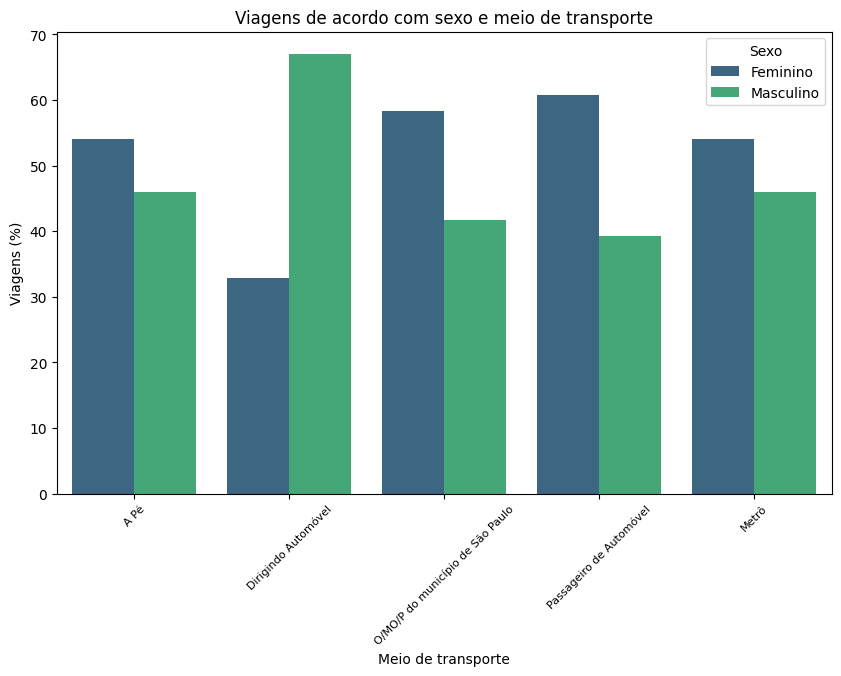

In [1070]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_t_modes_gender_rep, x='MODO_TRANSPORTE', y='REP (%)', hue='SEXO_DESC', palette='viridis')

plt.title("Viagens de acordo com sexo e meio de transporte")
plt.xlabel("Meio de transporte")
plt.ylabel("Viagens (%)")
plt.legend(title='Sexo')
plt.xticks(rotation=45, fontsize=8)

plt.show()

---
### Análise sobre a faixa etária do público 

In [977]:
selected_columns = ['FE_VIA', 'MODO_TRANSPORTE', 'SEXO_DESC', 'IDADE']
age_trips = df[selected_columns]
age_trips = age_trips.dropna(subset=['MODO_TRANSPORTE'])
age_trips.sample(3)

,FE_VIA,MODO_TRANSPORTE,SEXO_DESC,IDADE
93353,742.743774,O/MO/P de outros municípios,Masculino,20
7179,56.159599,A Pé,Masculino,40
117908,110.905868,Dirigindo Automóvel,Masculino,61


In [978]:
age_trips['IDADE'].min()

1

In [979]:
age_trips['IDADE'].max()

99

Discretizando a coluna IDADE:

In [980]:
bins = [0, 10, 18, 30, 45, 60, 75, 90, 100]  # Limites
labels = ['1-10', '11-18', '19-30', '31-45', '46-60', '60-75', '76-90', '90-99']
# Classificando as idades em intervalos
age_trips = age_trips.copy()
age_trips.loc[:, 'GRUPO_ETARIO'] = pd.cut(age_trips['IDADE'], bins=bins, labels=labels, right=False)
age_trips.sample(5)

,FE_VIA,MODO_TRANSPORTE,SEXO_DESC,IDADE,GRUPO_ETARIO
146268,299.410711,A Pé,Masculino,10,11-18
11945,32.362079,O/MO/P do município de São Paulo,Feminino,26,19-30
22738,347.073707,A Pé,Feminino,11,11-18
27773,60.503672,A Pé,Masculino,15,11-18
20778,90.403312,O/MO/P do município de São Paulo,Feminino,88,76-90


Filtra para apenas as viagens realizadas a pé:

In [981]:
walk_age_trips = age_trips.copy()
walk_age_trips = walk_age_trips.query('MODO_TRANSPORTE == "A Pé"')
walk_age_trips.sample(3)

,FE_VIA,MODO_TRANSPORTE,SEXO_DESC,IDADE,GRUPO_ETARIO
164798,201.186268,A Pé,Feminino,43,31-45
166304,50.315491,A Pé,Masculino,19,19-30
30087,35.341660,A Pé,Masculino,27,19-30


Calcula a soma do fator de expansão das viagens a pé:

In [982]:
sum_walk_fe = walk_age_trips['FE_VIA'].sum()

In [983]:
grouped_walk_age_gender_trips = walk_age_trips.groupby(['GRUPO_ETARIO', 'SEXO_DESC'])['FE_VIA'].sum().reset_index()
grouped_walk_age_gender_trips.head(4)

,GRUPO_ETARIO,SEXO_DESC,FE_VIA
0,1-10,Feminino,9.882429e+05
1,1-10,Masculino,1.058953e+06
2,11-18,Feminino,1.342266e+06
3,11-18,Masculino,1.548179e+06


In [984]:
grouped_walk_age_gender_trips.loc[:, 'REP (%)'] = (grouped_walk_age_gender_trips['FE_VIA'] / sum_walk_fe * 100).round(2)
grouped_walk_age_gender_trips.head(4)

,GRUPO_ETARIO,SEXO_DESC,FE_VIA,REP (%)
0,1-10,Feminino,9.882429e+05,7.40
1,1-10,Masculino,1.058953e+06,7.93
2,11-18,Feminino,1.342266e+06,10.05
3,11-18,Masculino,1.548179e+06,11.60


Gráfico: Viagens a Pé X Sexo, Faixa Etária

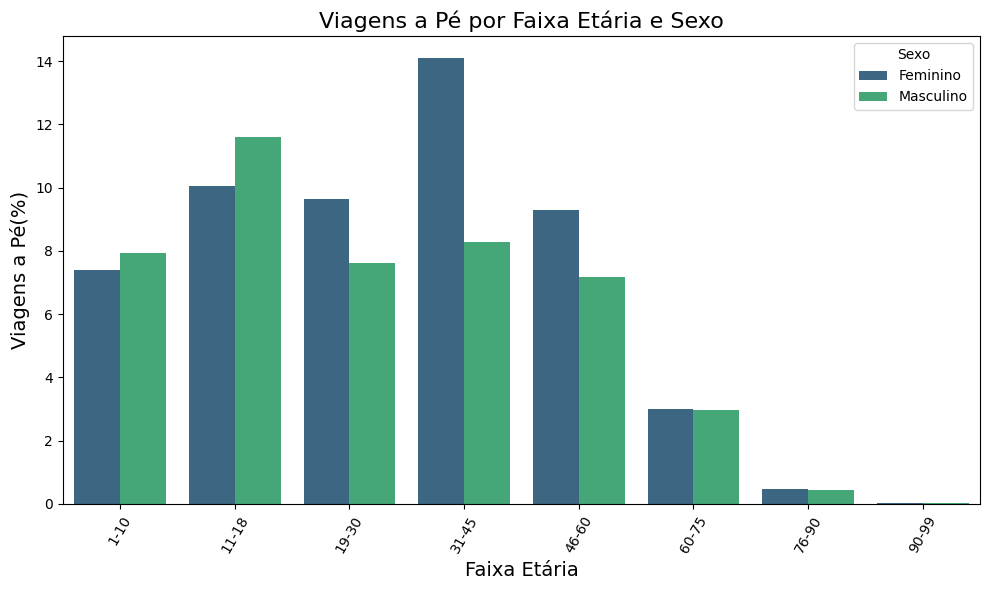

In [ ]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_walk_age_gender_trips, x='GRUPO_ETARIO', y='REP (%)', hue='SEXO_DESC', palette='viridis',errorbar=None)

# Configurando o título e os rótulos
plt.title('Viagens a pé de acordo com faixa etária e sexo', fontsize=16)
plt.xlabel('Faixa etária', fontsize=14)
plt.ylabel('Viagens a pé(%)', fontsize=14)
plt.legend(title='Sexo')
plt.xticks(rotation=60)  # Rotacionando os rótulos do eixo x
plt.tight_layout()  # Ajustando o layout

# Exibindo o gráfico
plt.show()

Análise da faixa etária sem considerar o sexo:

In [986]:
grouped_walk_age_trips = grouped_walk_age_gender_trips.groupby('GRUPO_ETARIO')['REP (%)'].sum().reset_index()
grouped_walk_age_trips.head(3)

,GRUPO_ETARIO,REP (%)
0,1-10,15.33
1,11-18,21.65
2,19-30,17.27


Gráfico: Viagens a Pé(%) X Faixa Etária  

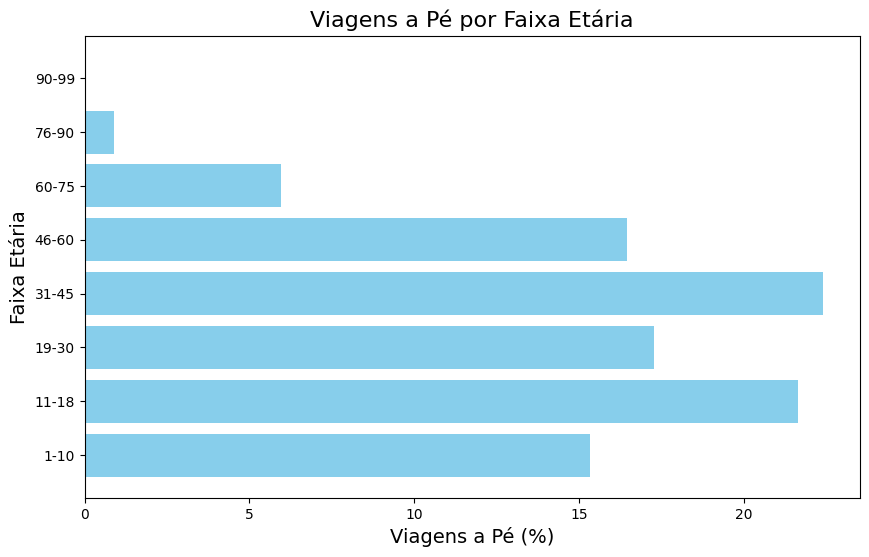

In [ ]:
# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(grouped_walk_age_trips['GRUPO_ETARIO'], grouped_walk_age_trips['REP (%)'], color='skyblue')

# Configurando o título e os rótulos
plt.title('Viagens a pé por faixa Etária', fontsize=16)
plt.xlabel('Viagens a pé (%)', fontsize=14)
plt.ylabel('Faixa etária', fontsize=14)

# Exibindo o gráfico
plt.show()

---
### Análise sobre o Critério Brasil dos pedestres
Analisando o grau de instrução e renda familiar das pessoas que se deslocam a pé

Dicionários para mapear as colunas numéricas de critério Brasil, condição de atividade e grau de instrução:

In [1010]:
criterioBr_map = {
    1: "A",
    2: "B1",
    3: "B2",
    4: "C1",
    5: "C2",
    6: "D - E"
}
cdAtivi_map = {
    1: "Tem trabalho regular",
    2: "Faz bico",
    3: "Em Licença Médica",
    4: "Aposentado/Pensionista",
    5: "Sem Trabalho",
    6: "Nunca Trabalhou",
    7: "Dona de Casa",
    8: "Estudante"
}
grauIns_map = {
    1: "Não Alfabetizado/Fundamental I Incompleto",
    2: "Fundamental I Completo/Fundamental II Incompleto",
    3: "Fundamental II Completo/Médio Incompleto",
    4: "Médio Completo/Superior Incompleto",
    5: "Superior Completo"
}

Filtra as viagens a pé:

In [1082]:
selected_columns = ['FE_VIA', 'MODO_TRANSPORTE', 'CRITERIOBR', 'CD_ATIVI', 'GRAU_INS', 'RENDA_FA']
cb_trips = df[selected_columns]
cb_trips = cb_trips.dropna(subset=['MODO_TRANSPORTE'])
cb_trips = cb_trips.query('MODO_TRANSPORTE == "A Pé"')
cb_trips = cb_trips.drop(columns="MODO_TRANSPORTE", axis=1)
cb_trips.sample(3)

,FE_VIA,CRITERIOBR,CD_ATIVI,GRAU_INS,RENDA_FA
120276,22.119988,1.0,4,5,8046.56
130713,309.898528,3.0,2,3,4442.62
117288,345.184346,5.0,8,2,1500.00


Cria uma coluna nominal para o Critério Brasil:

In [1135]:
# Categorizar a coluna CRITERIOBR
bins_criterioBR = [0, 1, 2, 3, 4, 5, 6]  # Ajuste conforme necessário
labels_criterioBR = ['A', 'B1', 'B2', 'C1', 'C2', 'D-E']
cb_trips['CRITERIOBR_cat'] = pd.cut(cb_trips['CRITERIOBR'], bins=bins_criterioBR, labels=labels_criterioBR)
cb_trips.sample(3)

,FE_VIA,CRITERIOBR,CD_ATIVI,GRAU_INS,RENDA_FA,CRITERIOBR_cat
10691,128.234330,3.0,2,4,3987.82,B2
112066,256.878260,5.0,5,4,2323.90,C2
2646,5.069592,5.0,8,3,2085.99,C2


Histogramas: Grau de Instrução, Renda Familiar, Critério Brasil e Condição de Atividade

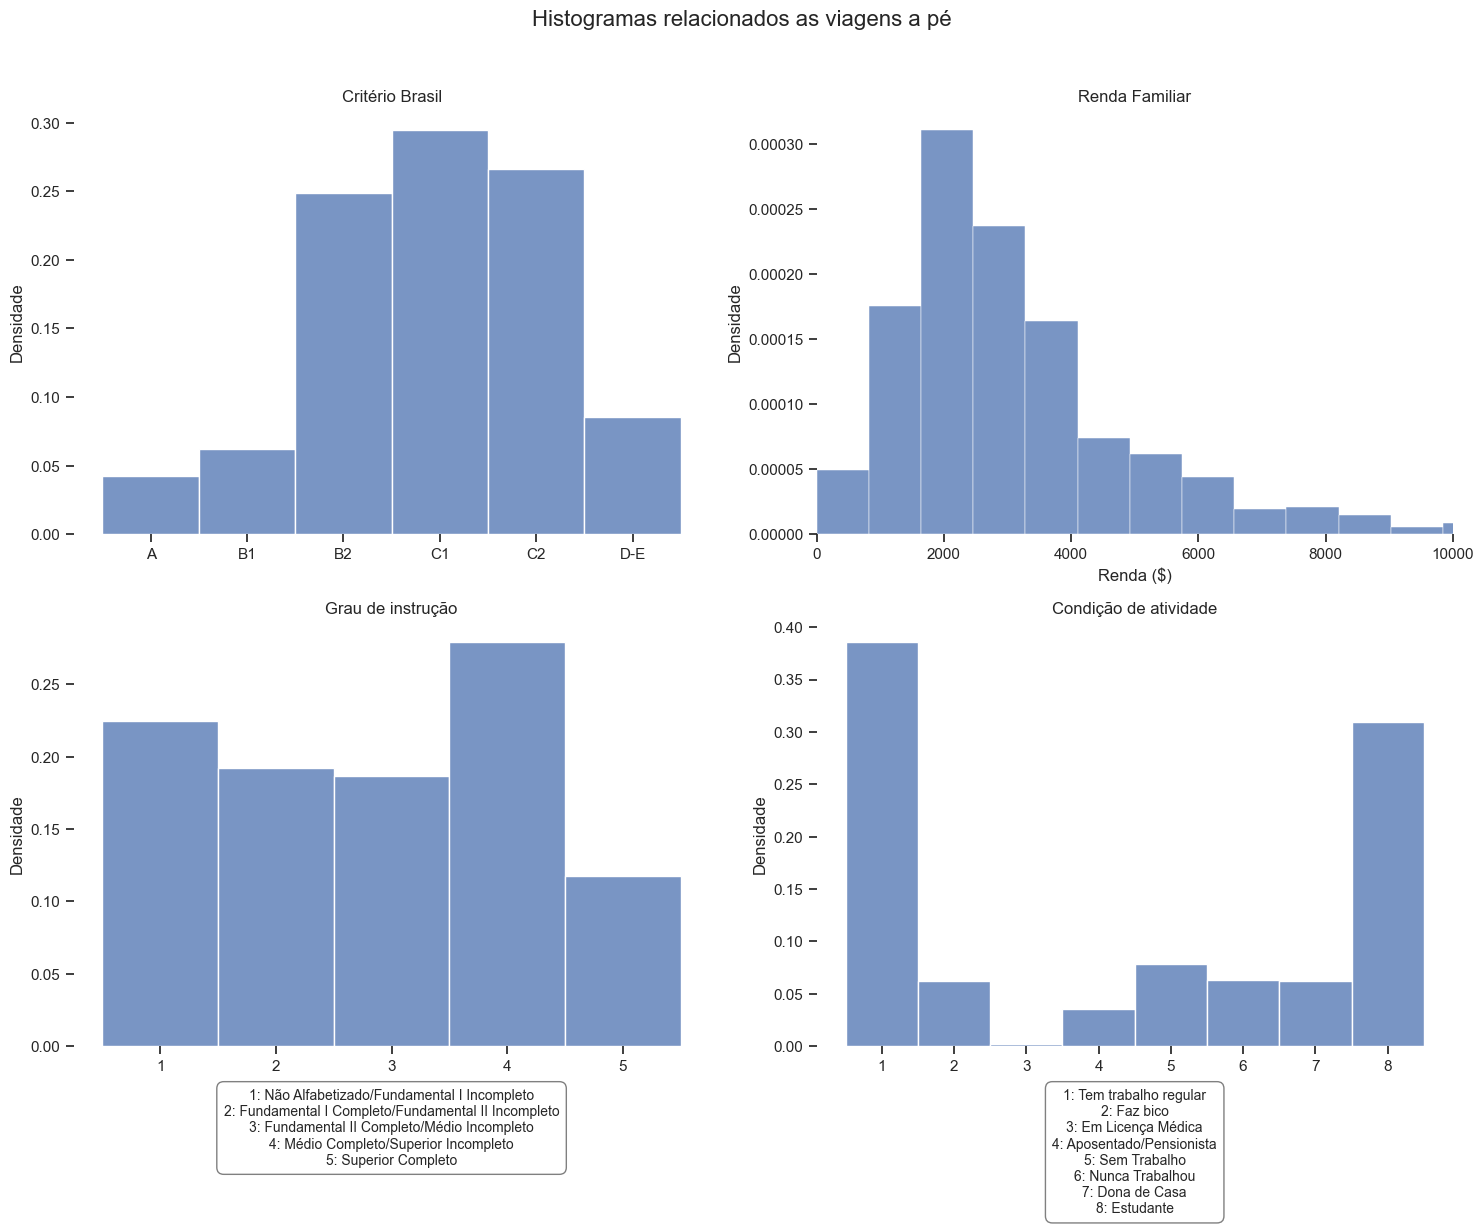

In [ ]:
sns.set_theme(style="ticks")

# Criando um plot com 2x2 histogramas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

fig.suptitle('Histogramas relacionados as viagens a pé', fontsize=16, y=1.02)

# Histograma para CRITERIOBR_cat
sns.histplot(cb_trips, x='CRITERIOBR_cat', weights='FE_VIA', ax=axes[0, 0], discrete=True, stat='density')
axes[0, 0].set_title('Critério Brasil')
# axes[0, 0].set_xlabel('Critério Brasil')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Densidade')
for spine in axes[0, 0].spines.values():
    spine.set_visible(False)

# Histograma para RENDA_FA
sns.histplot(cb_trips, x='RENDA_FA',weights='FE_VIA', ax=axes[0, 1], bins=100, stat='density')
axes[0, 1].set_title('Renda Familiar')
axes[0, 1].set_xlim(0, 10000)  # Limitando o range de RENDA_FA
axes[0, 1].set_xlabel('Renda ($)')
axes[0, 1].set_ylabel('Densidade')
for spine in axes[0, 1].spines.values():
    spine.set_visible(False)

# Histograma para GRAU_INS
sns.histplot(cb_trips, x='GRAU_INS', weights='FE_VIA', ax=axes[1, 0], discrete=True, stat='density')
axes[1, 0].set_title('Grau de instrução')
grau_legend = "\n".join([f"{grau}: {desc}" for grau, desc in grauIns_map.items()])
axes[1, 0].annotate(grau_legend, xy=(0.5, -0.1), xycoords='axes fraction', ha='center', va='top', fontsize=10,
                    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
# axes[1, 0].set_xlabel('Grau de instrução')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Densidade')
for spine in axes[1, 0].spines.values():
    spine.set_visible(False)

# Histograma para CD_ATIVI
sns.histplot(cb_trips, x='CD_ATIVI', weights='FE_VIA', ax=axes[1, 1], discrete=True, stat='density')
axes[1, 1].set_title('Condição de atividade')
# axes[1, 1].set_xlabel('Condição de atividade')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Densidade')
ativi_legend = "\n".join([f"{ativ}: {desc}" for ativ, desc in cdAtivi_map.items()])
axes[1, 1].annotate(ativi_legend, xy=(0.5, -0.1), xycoords='axes fraction', ha='center', va='top', fontsize=10,
                    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
for spine in axes[1, 1].spines.values():
    spine.set_visible(False)

# Ajustando layout
plt.tight_layout()
plt.show()

---
### Análise dos motivos de escolha do meio de transporte

In [1138]:
motives_map = {
    1: 'Trabalho Indústria',
    2: 'Trabalho Comércio',
    3: 'Trabalho Serviços',
    4: 'Escola/Educação',
    5: 'Compras',
    6: 'Médico/Dentista/Saúde',
    7: 'Recreação/Visitas/Lazer',
    8: 'Residência',
    9: 'Procurar Emprego',
    10: 'Assuntos Pessoais',
    11: 'Refeição'
}

pe_bici_map = {
    1: 'Pequena distância',
    2: 'Condução cara',
    3: 'Ponto/Estação distante',
    4: 'Condução demora para passar',
    5: 'Viagem demorada',
    6: 'Condução lotada',
    7: 'Atividade física',
    8: 'Outros motivos'
}

In [ ]:
selected_columns = ['FE_VIA', 'MODO_TRANSPORTE', 'MOTIVO_O', 'PE_BICI']
mot_trips = df[selected_columns]
mot_trips = mot_trips.dropna(subset=['MODO_TRANSPORTE'])
mot_trips = mot_trips.query('MODO_TRANSPORTE == "A Pé"')
mot_trips.drop(columns='MODO_TRANSPORTE', axis=1, inplace=True)
mot_trips.sample(3)

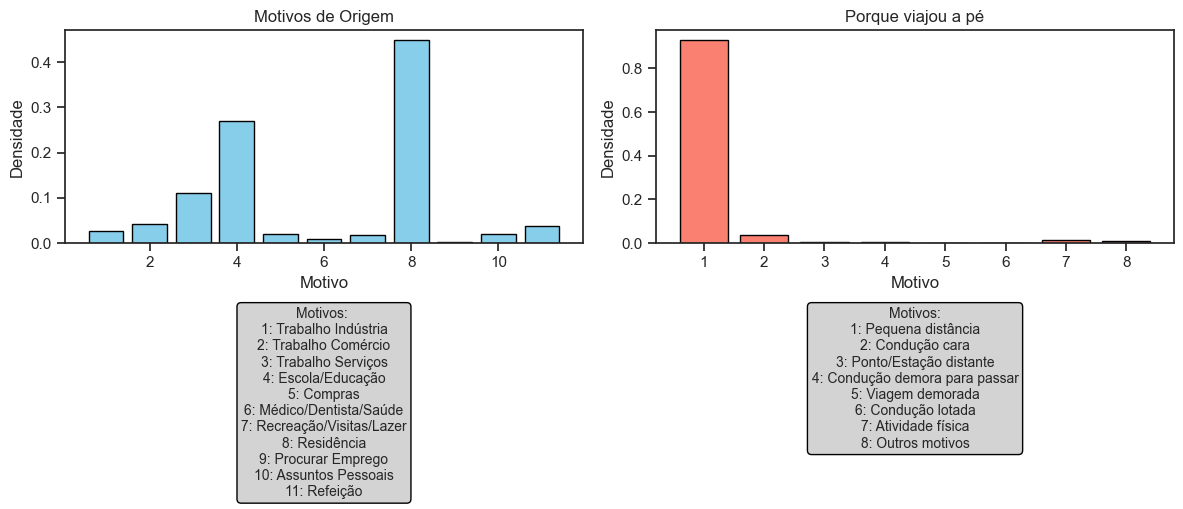

In [1158]:
# Plotagem do histograma ponderado para 'MOTIVO_O'
plt.figure(figsize=(12, 6))

# Gráfico para 'MOTIVO_O'
plt.subplot(1, 2, 1)
plt.hist(mot_trips['MOTIVO_O'], weights=mot_trips['FE_VIA'], bins=range(int(mot_trips['MOTIVO_O'].min()), int(mot_trips['MOTIVO_O'].max()) + 2), 
         align='left', rwidth=0.8, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Motivo')
plt.ylabel('Densidade')
plt.title('Motivos de Origem')
# Adiciona uma legenda embaixo do gráfico de MOTIVO_O
motives_legend = '\n'.join([f'{key}: {value}' for key, value in motives_map.items()])
plt.gca().text(0.5, -0.3, f"Motivos: \n{motives_legend}", ha='center', va='top', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey"),
               transform=plt.gca().transAxes)

# Gráfico para 'PE_BICI'
plt.subplot(1, 2, 2)
plt.hist(mot_trips['PE_BICI'], weights=mot_trips['FE_VIA'], bins=range(int(mot_trips['PE_BICI'].min()), int(mot_trips['PE_BICI'].max()) + 2),
         align='left', rwidth=0.8, color='salmon', edgecolor='black', density=True)
plt.xlabel('Motivo')
plt.ylabel('Densidade')
plt.title('Porque viajou a pé')
# Adiciona uma legenda embaixo do gráfico de PE_BICI
pe_bici_legend = '\n'.join([f'{key}: {value}' for key, value in pe_bici_map.items()])
plt.gca().text(0.5, -0.3, f"Motivos:\n{pe_bici_legend}", ha='center', va='top', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey"),
               transform=plt.gca().transAxes)

# Exibir os gráficos
plt.tight_layout()
plt.show()

---

### Análise Faixa Horária

In [988]:
selected_columns = ['FE_VIA', 'MODO_TRANSPORTE', 'SEXO_DESC', 'H_SAIDA', 'H_CHEG', 'DURACAO']
hour_trips = df[selected_columns]
hour_trips = hour_trips.dropna(subset=['MODO_TRANSPORTE'])
hour_trips.sample(3)

,FE_VIA,MODO_TRANSPORTE,SEXO_DESC,H_SAIDA,H_CHEG,DURACAO
55029,128.681232,O/MO/P do município de São Paulo,Masculino,22.0,23.0,20.0
170811,596.487984,Trem,Masculino,22.0,23.0,110.0
92993,576.929091,Transporte Escolar,Feminino,16.0,16.0,10.0


Filtra apenas para viagens a pé:

In [989]:
hour_trips.query('MODO_TRANSPORTE == "A Pé"', inplace=True)
hour_trips.sample(3)

,FE_VIA,MODO_TRANSPORTE,SEXO_DESC,H_SAIDA,H_CHEG,DURACAO
150155,229.754282,A Pé,Masculino,18.0,18.0,20.0
139812,328.643443,A Pé,Feminino,12.0,12.0,5.0
135097,1220.286872,A Pé,Feminino,12.0,13.0,10.0


In [990]:
hour_trips['H_SAIDA'].min()

0.0

In [991]:
hour_trips['H_SAIDA'].max()

23.0

Discretização do horário de saída para FAIXA_HORARIA:

In [992]:
bins = [1, 5, 9, 13, 16, 20, 24]  # Limites
labels = ['1-4h', '5-8h', '9-12h', '13-16h', '16-19h', '20-23h']
# Classificando o horário de saída em intervalos
hour_trips = hour_trips.copy()
hour_trips.loc[:, 'FAIXA_HORARIA'] = pd.cut(hour_trips['H_SAIDA'], bins=bins, labels=labels, right=False)
hour_trips.sample(3)

,FE_VIA,MODO_TRANSPORTE,SEXO_DESC,H_SAIDA,H_CHEG,DURACAO,FAIXA_HORARIA
29455,56.153591,A Pé,Masculino,8.0,8.0,10.0,5-8h
170657,449.145174,A Pé,Feminino,13.0,13.0,5.0,13-16h
153494,914.747085,A Pé,Masculino,11.0,11.0,15.0,9-12h


Calculando o percentual de viagens para cada faixa horária:

In [993]:
group_hour_trips = hour_trips.copy()
group_hour_trips = group_hour_trips.groupby('FAIXA_HORARIA')['FE_VIA'].sum().reset_index()
group_hour_trips.loc[:, 'REP (%)'] = (group_hour_trips['FE_VIA'] / sum_walk_fe * 100).round(2)
group_hour_trips

,FAIXA_HORARIA,FE_VIA,REP (%)
0,1-4h,2.808899e+04,0.21
1,5-8h,3.007799e+06,22.53
2,9-12h,4.169203e+06,31.23
3,13-16h,2.044716e+06,15.32
4,16-19h,3.512077e+06,26.31
5,20-23h,5.722421e+05,4.29


Gráfico: Viagens a Pé X Faixa Horária

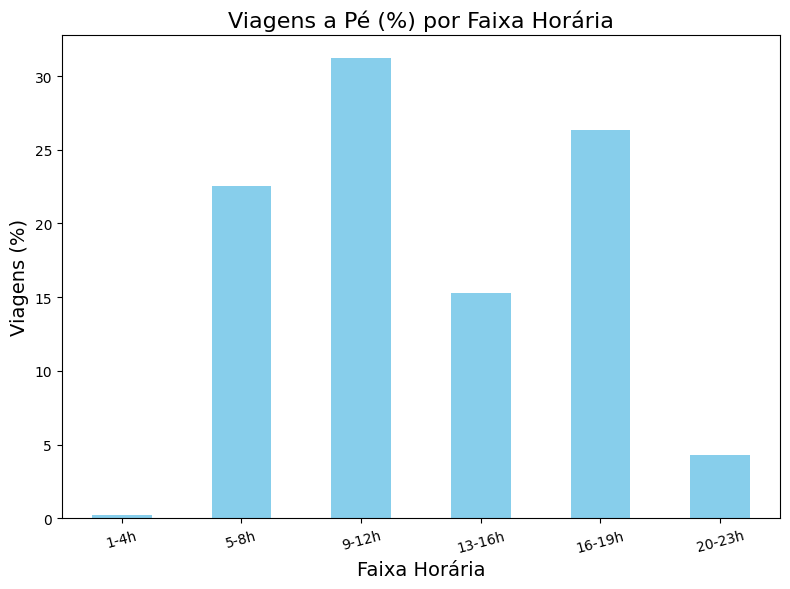

In [ ]:
group_hour_trips.plot(x='FAIXA_HORARIA', y='REP (%)', kind='bar', color='skyblue', legend=False, figsize=(8, 6))

plt.title('Viagens a é por faixa horária', fontsize=16)
plt.xlabel('Faixa Horária', fontsize=14)
plt.ylabel('Viagens (%)', fontsize=14)
plt.xticks(rotation=15)  # Rotacionando os rótulos do eixo x

plt.tight_layout()
plt.show()

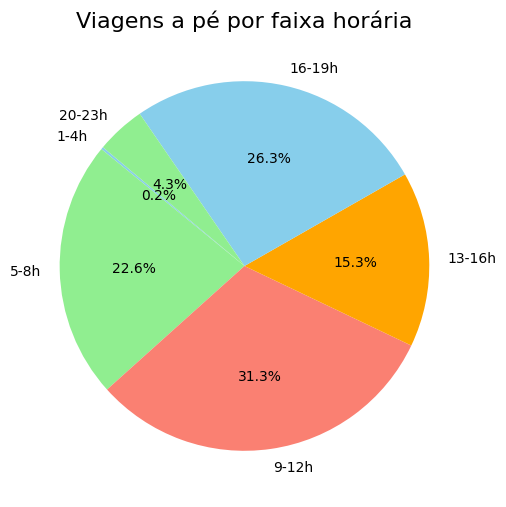

In [ ]:
plt.figure(figsize=(8, 6))
group_hour_trips.set_index('FAIXA_HORARIA')['REP (%)'].plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                                                            colors=['skyblue', 'lightgreen', 'salmon', 'orange'])

plt.title('Viagens a pé por faixa horária', fontsize=16)
plt.ylabel('')  # Remove o rótulo do eixo y para um visual mais limpo

plt.show()

Analisando a faixa horária juntamente ao sexo:

In [996]:
age_group_hour_trips = hour_trips.copy()
age_group_hour_trips = age_group_hour_trips.groupby(['FAIXA_HORARIA', 'SEXO_DESC'])['FE_VIA'].sum().reset_index()
age_group_hour_trips.loc[:, 'REP (%)'] = (age_group_hour_trips['FE_VIA'] / sum_walk_fe * 100).round(2)

age_group_hour_trips.head(4)

,FAIXA_HORARIA,SEXO_DESC,FE_VIA,REP (%)
0,1-4h,Feminino,8.200411e+03,0.06
1,1-4h,Masculino,1.988857e+04,0.15
2,5-8h,Feminino,1.641844e+06,12.30
3,5-8h,Masculino,1.365955e+06,10.23


Gráfico: Viagens a Pé x Sexo, Faixa Horária

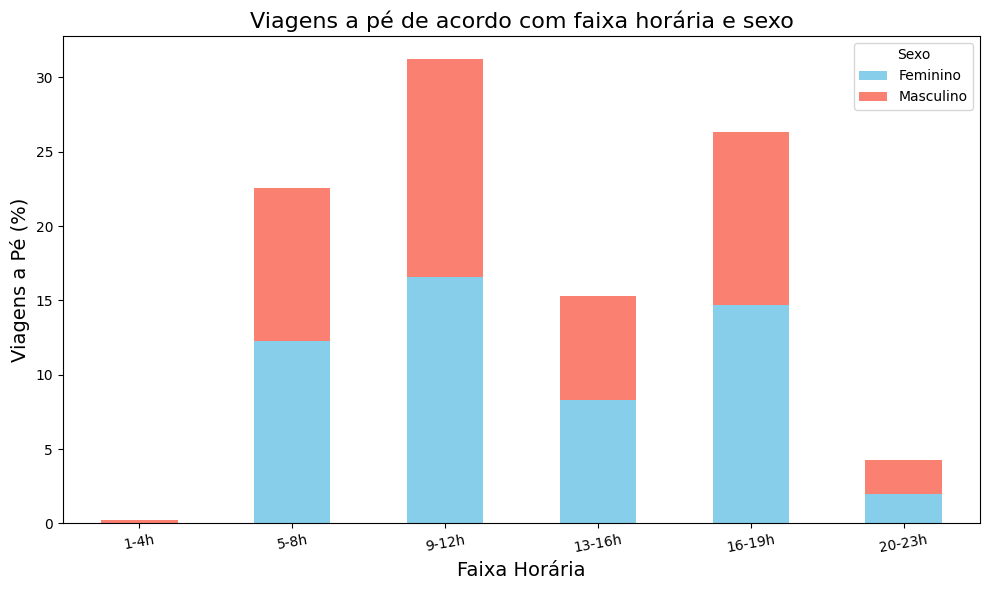

In [1066]:
# Pivot stacked table
age_group_hour_trips_pivot = age_group_hour_trips.pivot_table(values='REP (%)', index='FAIXA_HORARIA', columns='SEXO_DESC')

age_group_hour_trips_pivot.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))

plt.title('Viagens a pé de acordo com faixa horária e sexo', fontsize=16)
plt.xlabel('Faixa Horária', fontsize=14)
plt.ylabel('Viagens a Pé (%)', fontsize=14)
plt.xticks(rotation=10)  
plt.legend(title='Sexo')

plt.tight_layout()
plt.show()

Analisando o tempo de viagem:

In [998]:
duration_trips = hour_trips.copy()
duration_trips = duration_trips.groupby(['DURACAO','FAIXA_HORARIA'])['FE_VIA'].sum().reset_index()
duration_trips.sample(3)

,DURACAO,FAIXA_HORARIA,FE_VIA
107,18.0,20-23h,446.040601
355,90.0,5-8h,2297.750439
45,8.0,13-16h,18510.988887


Seleção das faixas horárias de pico:

In [999]:
first_rush__trips = duration_trips.query("FAIXA_HORARIA=='9-12h'")
last_rush__trips = duration_trips.query("FAIXA_HORARIA=='16-19h'")
last_rush__trips.sample(3)

,DURACAO,FAIXA_HORARIA,FE_VIA
94,16.0,16-19h,504.424803
142,24.0,16-19h,2462.014750
28,5.0,16-19h,679572.933731


Histograma: Duração de viagens a pé nas faixas horária ('9-12h' e '16-19h')

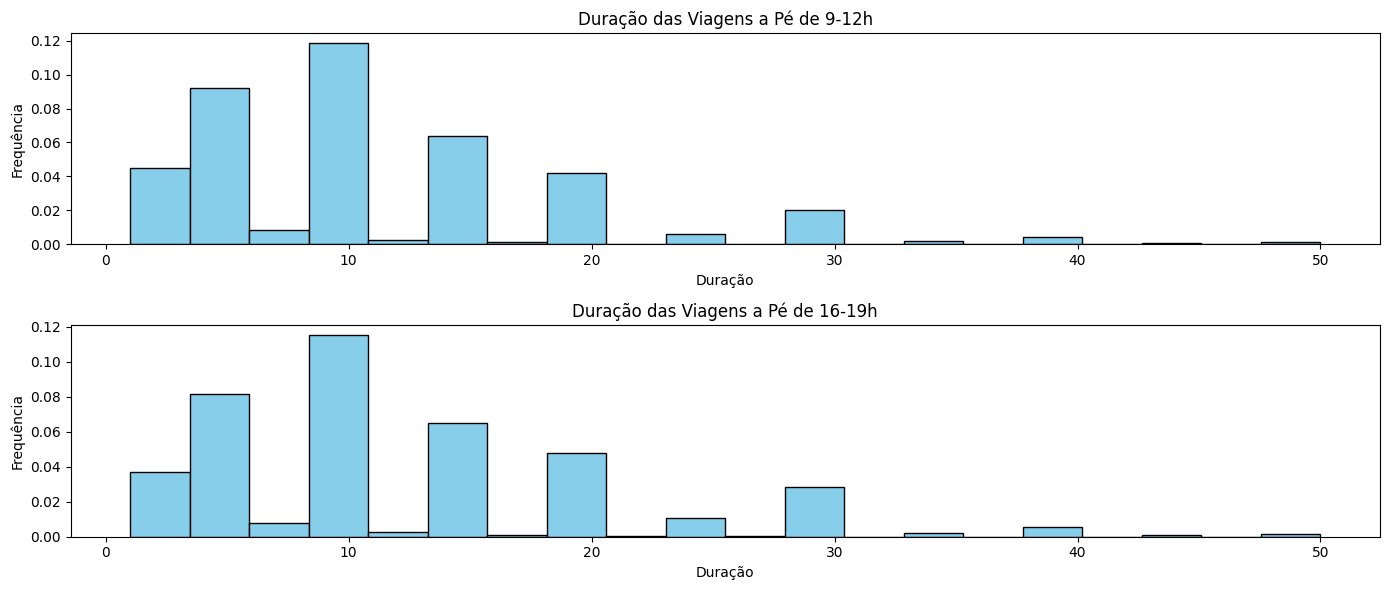

In [ ]:
# Criando a figura e os eixos para os dois gráficos
fig, axes = plt.subplots(2, 1, figsize=(14, 6))  # 2 linha, 1 coluna

# Primeiro histograma ('9-12h')
axes[0].hist(first_rush__trips['DURACAO'], bins=20, range=(1, 50), density=True, weights=first_rush__trips['FE_VIA'], color='skyblue', 
             edgecolor='black')
axes[0].set_title('Duração das viagens a pé de 9-12h')
axes[0].set_xlabel('Duração')
axes[0].set_ylabel('Frequência')

# Segundo histograma ('9-12h')
axes[1].hist(last_rush__trips['DURACAO'], bins=20, range=(1, 50), density=True, weights=last_rush__trips['FE_VIA'], color='skyblue', 
             edgecolor='black')
axes[1].set_title('Duração das viagens a pé de 16-19h')
axes[1].set_xlabel('Duração')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

---
### Análise sobre a distância

In [1001]:
selected_columns = ['FE_VIA', 'MODO_TRANSPORTE', 'DISTANCIA']
distance_df = df[selected_columns]
distance_df = distance_df.dropna(subset=['MODO_TRANSPORTE'])
distance_df.head(3)

,FE_VIA,MODO_TRANSPORTE,DISTANCIA
0,22.132647,A Pé,639.13
1,22.132647,A Pé,639.13
2,18.882487,Metrô,6651.77


Cálculo da distância média ponderada por meio de transporte:

In [1002]:
weighted_avg_distance = (
    distance_df.groupby('MODO_TRANSPORTE')
    .apply(lambda x: ((x['DISTANCIA'] * x['FE_VIA']).sum() / x['FE_VIA'].sum()).round(2))
    .reset_index(name='DISTANCIA_MEDIA_PONDERADA')
)
weighted_avg_distance.head(3)

,MODO_TRANSPORTE,DISTANCIA_MEDIA_PONDERADA
0,A Pé,612.59
1,Bicicleta,2950.18
2,Dirigindo Automóvel,6147.52


Gráfico: Distância média das viagens x Meio de Transporte

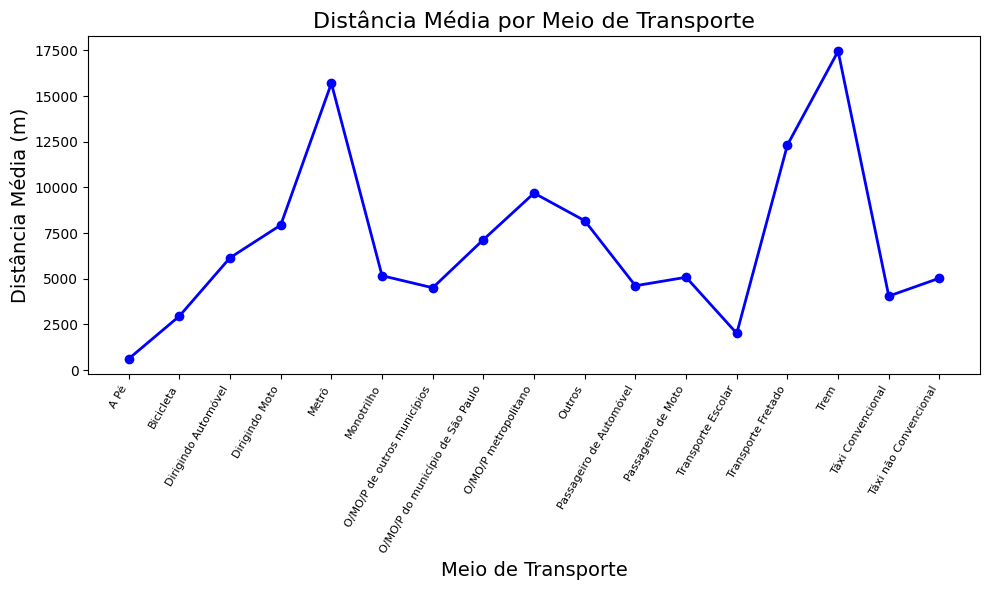

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(weighted_avg_distance['MODO_TRANSPORTE'], weighted_avg_distance['DISTANCIA_MEDIA_PONDERADA'], 
         marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Adicionando título e rótulos aos eixos
plt.title('Distância média por meio de transporte', fontsize=16)
plt.xlabel('Meio de Transporte', fontsize=14)
plt.ylabel('Distância Média (m)', fontsize=14)
plt.xticks(rotation=60, ha='right', fontsize=8)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [1004]:
walk_dist_df = distance_df.copy()
walk_dist_df = walk_dist_df.query("MODO_TRANSPORTE == 'A Pé'")
walk_dist_df.sample(3)

,FE_VIA,MODO_TRANSPORTE,DISTANCIA
89475,71.039073,A Pé,494.45
38494,137.848156,A Pé,1182.71
5243,123.922597,A Pé,117.63


Histograma: Distância das viagens a pé 

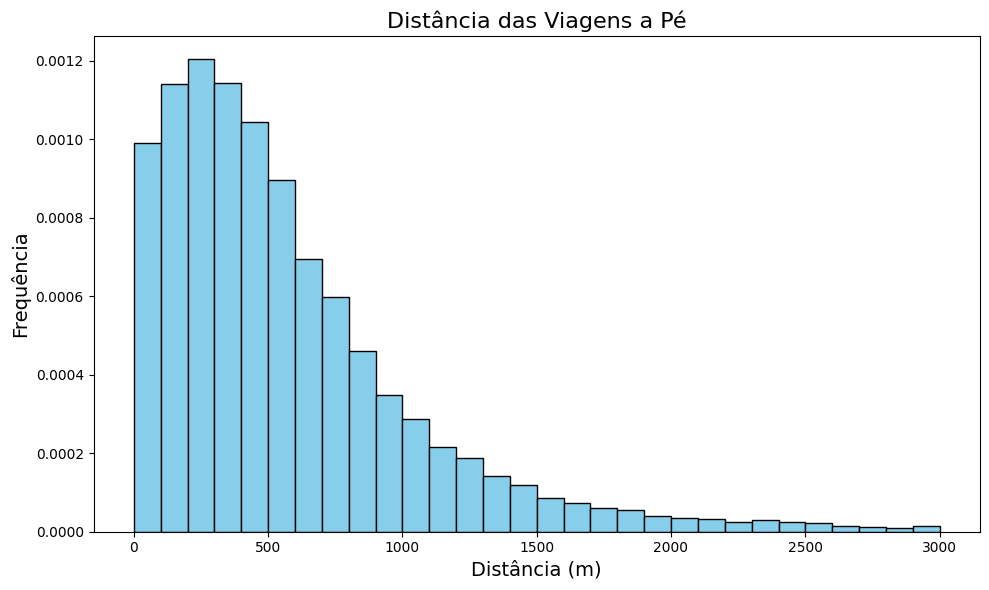

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(walk_dist_df['DISTANCIA'], bins=30, range=(1, 3000), density=True, weights=walk_dist_df['FE_VIA'], color='skyblue', edgecolor='black')

plt.title('Distância das viagens a pé', fontsize=16)
plt.xlabel('Distância (m)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

plt.tight_layout()
plt.show()